In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates

Data from National Data Buoy Center (NDBC)
* https://www.ndbc.noaa.gov
* station 44008 (Georges Bank)
* historical standard meteorological data

Georges Bank (44008):
* All of 2022 data:
    * missing air temperature after May
* Jan & Feb 2023 data:
    * missing all air temperature

In [2]:
#data = pd.read_csv('44008h2022.txt', delim_whitespace=True, header=1)
#data = pd.read_csv('44008_Jan2023.txt', delim_whitespace=True, header=1)
#data = pd.read_csv('44008_Feb2023.txt', delim_whitespace=True, header=1)

Delaware Bay (44009): 
* Feb 2023 data: 

In [3]:
data = pd.read_csv('44009_Feb2023.txt', delim_whitespace=True, header=1)

In [4]:
df = data[['#yr', 'mo', 'dy', 'hr', 'mn', 'degC', 'degC.1']]

In [5]:
df = df.rename(columns={'#yr':'YY', 'mo':'MM', 'dy':'DD', 
                            'hr':'hh', 'mn':'mm', 'degC':'ATMP', 'degC.1':'WTMP'})

In [6]:
df_date = pd.to_datetime(df['YY'].astype(str) + ' ' + df['MM'].astype(str) + ' ' + df['DD'].astype(str) 
                      + ' ' + df['hh'].astype(str) + ' ' + df['mm'].astype(str), format='%Y %m %d %H %M')

df['datetime'] = df_date

In [7]:
df

,YY,MM,DD,hh,mm,ATMP,WTMP,datetime
0,2023,2,1,0,0,4.3,8.5,2023-02-01 00:00:00
1,2023,2,1,0,10,4.4,8.5,2023-02-01 00:10:00
2,2023,2,1,0,20,4.4,8.5,2023-02-01 00:20:00
3,2023,2,1,0,30,4.4,8.5,2023-02-01 00:30:00
4,2023,2,1,0,40,4.4,8.4,2023-02-01 00:40:00
...,...,...,...,...,...,...,...,...
4025,2023,2,28,23,10,7.3,7.5,2023-02-28 23:10:00
4026,2023,2,28,23,20,7.3,7.5,2023-02-28 23:20:00
4027,2023,2,28,23,30,7.3,7.5,2023-02-28 23:30:00
4028,2023,2,28,23,40,7.3,7.5,2023-02-28 23:40:00


Filtering out entries where either air or water temperature is missing:

In [8]:
df = df[(df['ATMP'] != 999.0) & (df['WTMP'] != 999.0)]

In [9]:
df['MM'].unique()

array([2])

In [15]:
buoy_num = 44009
mon_str = 2
day_str = 7

In [16]:
day = df[(df['MM'] == mon_str) & (df['DD'] == day_str)]

In [17]:
day

,YY,MM,DD,hh,mm,ATMP,WTMP,datetime
864,2023,2,7,0,0,6.9,7.4,2023-02-07 00:00:00
865,2023,2,7,0,10,6.9,7.4,2023-02-07 00:10:00
866,2023,2,7,0,20,6.9,7.4,2023-02-07 00:20:00
867,2023,2,7,0,30,6.9,7.4,2023-02-07 00:30:00
868,2023,2,7,0,40,6.9,7.1,2023-02-07 00:40:00
...,...,...,...,...,...,...,...,...
1003,2023,2,7,23,10,6.6,7.3,2023-02-07 23:10:00
1004,2023,2,7,23,20,6.6,7.3,2023-02-07 23:20:00
1005,2023,2,7,23,30,6.7,7.3,2023-02-07 23:30:00
1006,2023,2,7,23,40,6.8,7.3,2023-02-07 23:40:00


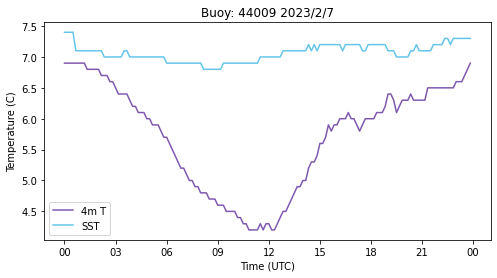

In [18]:
atmp = day['ATMP']
wtmp = day['WTMP']
dt = day['datetime']

fig, ax = plt.subplots(1, figsize=(8,4))
ax.plot(dt, atmp, c='#7F58AF', label='4m T')
ax.plot(dt, wtmp, c='#64C5EB', label='SST')
ax.legend()

myFmt = mdates.DateFormatter('%H')
ax.xaxis.set_major_formatter(myFmt)

ax.set_xlabel('Time (UTC)')
ax.set_ylabel('Temperature (C)')
ax.set_title('Buoy: ' + str(buoy_num) + ' 2023/' + str(mon_str) + '/' + str(day_str))
plt.show()

Compare this inversion against the FLC case on Feb 28 2023

In [19]:
for i in range(13):
    hr_str = i

    select = day[(day['hh'] == hr_str) & (day['mm'] == 0)]

    print("Hour " + str(i) + ": " + str(select['ATMP'] - select['WTMP']))

Hour 0: 864   -0.5
dtype: float64
Hour 1: 870   -0.2
dtype: float64
Hour 2: 876   -0.3
dtype: float64
Hour 3: 882   -0.5
dtype: float64
Hour 4: 888   -0.8
dtype: float64
Hour 5: 894   -1.0
dtype: float64
Hour 6: 900   -1.2
dtype: float64
Hour 7: 906   -1.7
dtype: float64
Hour 8: 912   -2.1
dtype: float64
Hour 9: 918   -2.2
dtype: float64
Hour 10: 924   -2.4
dtype: float64
Hour 11: 930   -2.7
dtype: float64
Hour 12: 936   -2.7
dtype: float64
